In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import pickle
from datetime import timedelta

In [44]:
data = pd.read_pickle("../preparation/prepped_files/07_integration.pkl")
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,PREV_FLIGHTS_1H,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5612585,F9,LAS,0,230.0,1747.0,2016-12-31 21:45:00,2017-01-01 04:35:00,2016-12-31 21:45:00,2017-01-01 04:25:00,0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5614966,DL,SFO,-3,268.0,2139.0,2016-12-31 21:45:00,2017-01-01 05:13:00,2016-12-31 21:42:00,2017-01-01 05:05:00,2,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5616651,DL,SAN,-6,241.0,1892.0,2016-12-31 23:00:00,2017-01-01 06:01:00,2016-12-31 22:54:00,2017-01-01 05:41:00,2,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5616326,DL,SFO,-5,270.0,2139.0,2016-12-31 22:35:00,2017-01-01 06:05:00,2016-12-31 22:30:00,2017-01-01 05:58:00,2,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5613460,UA,SFO,6,278.0,2139.0,2016-12-31 22:42:00,2017-01-01 06:20:00,2016-12-31 22:48:00,2017-01-01 06:14:00,2,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122.0,577.0,2017-12-31 21:35:00,2017-12-31 23:37:00,2017-12-31 21:30:00,2017-12-31 23:27:00,8,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11284363,WN,MDW,20,110.0,591.0,2017-12-31 20:55:00,2017-12-31 23:45:00,2017-12-31 21:15:00,2017-12-31 23:50:00,8,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11283412,WN,DEN,43,170.0,1199.0,2017-12-31 18:55:00,2017-12-31 23:45:00,2017-12-31 19:38:00,2018-01-01 00:02:00,8,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11286614,B6,BOS,43,179.0,946.0,2017-12-31 20:50:00,2017-12-31 23:49:00,2017-12-31 21:33:00,2018-01-01 00:19:00,11,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Dropping scenario unimportant features
data = data.drop(["CRS_DEP_DATE","ACT_DEP_DATE","ACT_ARR_DATE"],axis=1)
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_ARR_DATE,PREV_FLIGHTS_1H,ARR_DELAY,Physical Class (Engine),Engines,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5612585,F9,LAS,0,230.0,1747.0,2017-01-01 04:35:00,0,-10,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5614966,DL,SFO,-3,268.0,2139.0,2017-01-01 05:13:00,2,-8,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5616651,DL,SAN,-6,241.0,1892.0,2017-01-01 06:01:00,2,-20,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5616326,DL,SFO,-5,270.0,2139.0,2017-01-01 06:05:00,2,-7,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5613460,UA,SFO,6,278.0,2139.0,2017-01-01 06:20:00,2,-6,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122.0,577.0,2017-12-31 23:37:00,8,-10,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11284363,WN,MDW,20,110.0,591.0,2017-12-31 23:45:00,8,5,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11283412,WN,DEN,43,170.0,1199.0,2017-12-31 23:45:00,8,17,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11286614,B6,BOS,43,179.0,946.0,2017-12-31 23:49:00,11,30,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348136 entries, 5612585 to 11291238
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   OP_UNIQUE_CARRIER               348136 non-null  object        
 1   ORIGIN                          348136 non-null  object        
 2   DEP_DELAY                       348136 non-null  int32         
 3   CRS_ELAPSED_TIME                348136 non-null  float64       
 4   DISTANCE                        348136 non-null  float64       
 5   CRS_ARR_DATE                    348136 non-null  datetime64[ns]
 6   PREV_FLIGHTS_1H                 348136 non-null  int64         
 7   ARR_DELAY                       348136 non-null  int32         
 8   Physical Class (Engine)         348136 non-null  object        
 9   Engines                         348136 non-null  float64       
 10  Approach Speed(Vref)            348136 non-null 

In [47]:
mode_vars = ["Physical Class (Engine)", "Engines", "Wingtip Configuration",  ]
mean_vars= ["Approach Speed(Vref)", "Wingspan, ft", "Length, ft", "Tail Height, ft(@ OEW)", "MTOW", "Parking Area (WS x Length), sf", "tmpf", "dwpf", "relh", "drct", "sknt", "p01i", "alti", "mslp", "vsby", "feel"]

for col in data.columns:
    if col in mode_vars:
        data[col] = data[col].replace(np.nan, data[col].mode()[0])
    if col in mean_vars:
        data[col] = data[col].replace(np.nan, data[col].mean())

data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_ARR_DATE,PREV_FLIGHTS_1H,ARR_DELAY,Physical Class (Engine),Engines,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5612585,F9,LAS,0,230.0,1747.0,2017-01-01 04:35:00,0,-10,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5614966,DL,SFO,-3,268.0,2139.0,2017-01-01 05:13:00,2,-8,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5616651,DL,SAN,-6,241.0,1892.0,2017-01-01 06:01:00,2,-20,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5616326,DL,SFO,-5,270.0,2139.0,2017-01-01 06:05:00,2,-7,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5613460,UA,SFO,6,278.0,2139.0,2017-01-01 06:20:00,2,-6,Jet,2.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122.0,577.0,2017-12-31 23:37:00,8,-10,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11284363,WN,MDW,20,110.0,591.0,2017-12-31 23:45:00,8,5,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11283412,WN,DEN,43,170.0,1199.0,2017-12-31 23:45:00,8,17,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11286614,B6,BOS,43,179.0,946.0,2017-12-31 23:49:00,11,30,Jet,2.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348136 entries, 5612585 to 11291238
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   OP_UNIQUE_CARRIER               348136 non-null  object        
 1   ORIGIN                          348136 non-null  object        
 2   DEP_DELAY                       348136 non-null  int32         
 3   CRS_ELAPSED_TIME                348136 non-null  float64       
 4   DISTANCE                        348136 non-null  float64       
 5   CRS_ARR_DATE                    348136 non-null  datetime64[ns]
 6   PREV_FLIGHTS_1H                 348136 non-null  int64         
 7   ARR_DELAY                       348136 non-null  int32         
 8   Physical Class (Engine)         348136 non-null  object        
 9   Engines                         348136 non-null  float64       
 10  Approach Speed(Vref)            348136 non-null 

In [49]:
data["CRS_ELAPSED_TIME"] = data["CRS_ELAPSED_TIME"].astype(int)
data["DISTANCE"] = data["DISTANCE"].astype(int)

In [50]:
data["ARR_DAY"] = data["CRS_ARR_DATE"].apply(lambda x: x.weekday())
data["ARR_MIN_OF_DAY"] = data["CRS_ARR_DATE"].apply(lambda x: x.hour * 60 + x.minute)
data = data.drop(["CRS_ARR_DATE"],axis="columns")
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Physical Class (Engine),Engines,Approach Speed(Vref),...,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY,ARR_MIN_OF_DAY
5612585,F9,LAS,0,230,1747,0,-10,Jet,2.0,136.0,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,275
5614966,DL,SFO,-3,268,2139,2,-8,Jet,2.0,141.0,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,313
5616651,DL,SAN,-6,241,1892,2,-20,Jet,2.0,141.0,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,361
5616326,DL,SFO,-5,270,2139,2,-7,Jet,2.0,143.0,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,365
5613460,UA,SFO,6,278,2139,2,-6,Jet,2.0,141.0,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122,577,8,-10,Jet,2.0,136.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6,1417
11284363,WN,MDW,20,110,591,8,5,Jet,2.0,141.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6,1425
11283412,WN,DEN,43,170,1199,8,17,Jet,2.0,141.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6,1425
11286614,B6,BOS,43,179,946,11,30,Jet,2.0,136.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6,1429


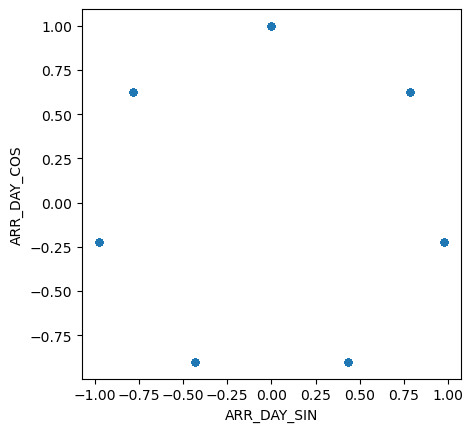

In [51]:
def encode(data, col, max_val):
    data[col + '_SIN'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_COS'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data = encode(data, "ARR_DAY", 7)
ax = data.plot.scatter('ARR_DAY_SIN', 'ARR_DAY_COS').set_aspect('equal')

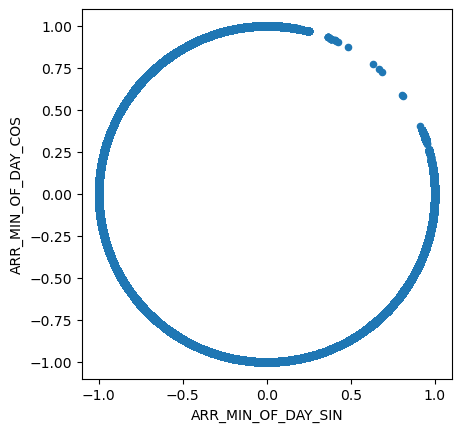

In [52]:
data = encode(data, "ARR_MIN_OF_DAY", 24*60)
ax = data.plot.scatter('ARR_MIN_OF_DAY_SIN', 'ARR_MIN_OF_DAY_COS').set_aspect('equal')

In [53]:
data = data.join(pd.get_dummies(data["Physical Class (Engine)"])).drop(["Physical Class (Engine)"],axis=1)
data = data.join(pd.get_dummies(data["Wingtip Configuration"])).drop(["Wingtip Configuration"],axis=1)

In [54]:
data = data.drop(["ARR_MIN_OF_DAY", "ARR_DAY"], axis=1)
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Engines,Approach Speed(Vref),"Wingspan, ft",...,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,Jet,Turboprop,no winglets,winglets,wingtip fences
5612585,F9,LAS,0,230,1747,0,-10,2.0,136.0,111.88,...,1.0,-0.781831,0.62349,0.932008,0.362438,1,0,0,0,1
5614966,DL,SFO,-3,268,2139,2,-8,2.0,141.0,112.58,...,1.0,-0.781831,0.62349,0.979045,0.203642,1,0,1,0,0
5616651,DL,SAN,-6,241,1892,2,-20,2.0,141.0,112.58,...,1.0,-0.781831,0.62349,0.999990,-0.004363,1,0,1,0,0
5616326,DL,SFO,-5,270,2139,2,-7,2.0,143.0,124.83,...,1.0,-0.781831,0.62349,0.999762,-0.021815,1,0,1,0,0
5613460,UA,SFO,6,278,2139,2,-6,2.0,141.0,112.58,...,1.0,-0.781831,0.62349,0.996195,-0.087156,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122,577,8,-10,2.0,136.0,111.88,...,0.0,-0.781831,0.62349,-0.100188,0.994969,1,0,0,0,1
11284363,WN,MDW,20,110,591,8,5,2.0,141.0,112.58,...,0.0,-0.781831,0.62349,-0.065403,0.997859,1,0,1,0,0
11283412,WN,DEN,43,170,1199,8,17,2.0,141.0,112.58,...,0.0,-0.781831,0.62349,-0.065403,0.997859,1,0,1,0,0
11286614,B6,BOS,43,179,946,11,30,2.0,136.0,111.88,...,0.0,-0.781831,0.62349,-0.047978,0.998848,1,0,0,0,1


In [55]:
#cols = list(data.columns)
#cols.remove("ARR_DELAY_MINS")
#cols = cols[40:44] + cols[:40] + cols[44:]
#cols.append("ARR_DELAY_MINS")
#data = data[cols]
#data

In [56]:
data.columns

Index(['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEP_DELAY', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'PREV_FLIGHTS_1H', 'ARR_DELAY', 'Engines',
       'Approach Speed(Vref)', 'Wingspan, ft', 'Length, ft',
       'Tail Height, ft(@ OEW)', 'MTOW', 'Parking Area (WS x Length), sf',
       'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby',
       'feel', 'EVENT_BR', 'EVENT_DZ', 'EVENT_FG', 'EVENT_FU', 'EVENT_GR',
       'EVENT_GS', 'EVENT_HZ', 'EVENT_IC', 'EVENT_RA', 'EVENT_SG', 'EVENT_SN',
       'EVENT_TS', '08L/26R', '08R/26L', '09L/27R', '09R/27L', '10/28',
       'ARR_DAY_SIN', 'ARR_DAY_COS', 'ARR_MIN_OF_DAY_SIN',
       'ARR_MIN_OF_DAY_COS', 'Jet', 'Turboprop', 'no winglets', 'winglets',
       'wingtip fences'],
      dtype='object')

In [57]:
data.iloc[0]

OP_UNIQUE_CARRIER                       F9
ORIGIN                                 LAS
DEP_DELAY                                0
CRS_ELAPSED_TIME                       230
DISTANCE                              1747
PREV_FLIGHTS_1H                          0
ARR_DELAY                              -10
Engines                                2.0
Approach Speed(Vref)                 136.0
Wingspan, ft                        111.88
Length, ft                          123.27
Tail Height, ft(@ OEW)               39.63
MTOW                              171961.0
Parking Area (WS x Length), sf     13791.0
tmpf                                  42.1
dwpf                                  41.0
relh                                 95.84
drct                                 140.0
sknt                                   6.0
p01i                                  0.03
alti                                 30.09
mslp                                1018.8
vsby                                   5.0
feel       

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348136 entries, 5612585 to 11291238
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OP_UNIQUE_CARRIER               348136 non-null  object 
 1   ORIGIN                          348136 non-null  object 
 2   DEP_DELAY                       348136 non-null  int32  
 3   CRS_ELAPSED_TIME                348136 non-null  int32  
 4   DISTANCE                        348136 non-null  int32  
 5   PREV_FLIGHTS_1H                 348136 non-null  int64  
 6   ARR_DELAY                       348136 non-null  int32  
 7   Engines                         348136 non-null  float64
 8   Approach Speed(Vref)            348136 non-null  float64
 9   Wingspan, ft                    348136 non-null  float64
 10  Length, ft                      348136 non-null  float64
 11  Tail Height, ft(@ OEW)          348136 non-null  float64
 12  MTOW    

In [59]:
#y = data[data.columns[-1:]].to_numpy()
#X = data[data.columns[:-1]].to_numpy()
#bins_pos = []

#for bin_step in range(-105, 150, 30):
#    bins_pos.append(bin_step)

#print(bins_pos)
#plt.hist(y, bins=bins_pos)
#plt.show()

In [60]:
#fig = plt.figure(figsize=(13,5))
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
#
#bins1 = [y.min(),-45,-15,15,45,y.max()+1]
#labels1 = ["Strong Early","Early","Normal","Late","Strong Late"]
#bins2 = [y.min(),-15,15,y.max()+1]
#labels2 = ["Early","Normal","Late"]
#cats1 = pd.cut(data.ARR_DELAY_MINS, bins1, labels = labels1,include_lowest = True)
#cats2 = pd.cut(data.ARR_DELAY_MINS, bins2, labels = labels2,include_lowest = True)

#ax1.bar(cats1.value_counts().index.to_list(), list(cats1.value_counts().values))
#ax2.bar(cats2.value_counts().index.to_list(), list(cats2.value_counts().values))
#plt.plot()

In [61]:
#data["ARR_DELAY_CATS"] = list(cats2.values)
#data = data.drop(["ARR_DELAY_MINS"], axis="columns")
#y_dict = {
#    "Early" : 0,
#    "Normal" : 1,
#    "Late" : 2
#}
#data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))
#data

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348136 entries, 5612585 to 11291238
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OP_UNIQUE_CARRIER               348136 non-null  object 
 1   ORIGIN                          348136 non-null  object 
 2   DEP_DELAY                       348136 non-null  int32  
 3   CRS_ELAPSED_TIME                348136 non-null  int32  
 4   DISTANCE                        348136 non-null  int32  
 5   PREV_FLIGHTS_1H                 348136 non-null  int64  
 6   ARR_DELAY                       348136 non-null  int32  
 7   Engines                         348136 non-null  float64
 8   Approach Speed(Vref)            348136 non-null  float64
 9   Wingspan, ft                    348136 non-null  float64
 10  Length, ft                      348136 non-null  float64
 11  Tail Height, ft(@ OEW)          348136 non-null  float64
 12  MTOW    

In [63]:
data = data.drop(["Parking Area (WS x Length), sf", "alti", "dwpf", "wingtip fences", "winglets", "Turboprop", "EVENT_SG"], axis="columns")
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Engines,Approach Speed(Vref),"Wingspan, ft",...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,Jet,no winglets
5612585,F9,LAS,0,230,1747,0,-10,2.0,136.0,111.88,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.932008,0.362438,1,0
5614966,DL,SFO,-3,268,2139,2,-8,2.0,141.0,112.58,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979045,0.203642,1,1
5616651,DL,SAN,-6,241,1892,2,-20,2.0,141.0,112.58,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999990,-0.004363,1,1
5616326,DL,SFO,-5,270,2139,2,-7,2.0,143.0,124.83,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999762,-0.021815,1,1
5613460,UA,SFO,6,278,2139,2,-6,2.0,141.0,112.58,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.996195,-0.087156,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122,577,8,-10,2.0,136.0,111.88,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.100188,0.994969,1,0
11284363,WN,MDW,20,110,591,8,5,2.0,141.0,112.58,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.065403,0.997859,1,1
11283412,WN,DEN,43,170,1199,8,17,2.0,141.0,112.58,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.065403,0.997859,1,1
11286614,B6,BOS,43,179,946,11,30,2.0,136.0,111.88,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.047978,0.998848,1,0


In [64]:


F_cols = ["tmpf", "feel"]
knt_cols = ["sknt","Approach Speed(Vref)"]
ft_cols = ["Wingspan, ft", "Length, ft", "Tail Height, ft(@ OEW)"]
mile_cols = ["DISTANCE"]
lb_cols = ["MTOW"]

for col in data[F_cols]:
    data[col] = F_to_C_deg(data[col])
for col in data[knt_cols]:
    data[col] = knt_to_kmh(data[col])
for col in data[ft_cols]:
    data[col] = ft_to_m(data[col])
for col in data[mile_cols]:
    data[col] = mile_to_km(data[col])
for col in data[lb_cols]:
    data[col] = lb_to_kg(data[col])
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Engines,Approach Speed(Vref),"Wingspan, ft",...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,Jet,no winglets
5612585,F9,LAS,0,230,2811.51698,0,-10,2.0,251.872,34.101024,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.932008,0.362438,1,0
5614966,DL,SFO,-3,268,3442.37826,2,-8,2.0,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979045,0.203642,1,1
5616651,DL,SAN,-6,241,3044.87128,2,-20,2.0,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999990,-0.004363,1,1
5616326,DL,SFO,-5,270,3442.37826,2,-7,2.0,264.836,38.048184,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999762,-0.021815,1,1
5613460,UA,SFO,6,278,3442.37826,2,-6,2.0,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.996195,-0.087156,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122,928.58918,8,-10,2.0,251.872,34.101024,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.100188,0.994969,1,0
11284363,WN,MDW,20,110,951.11994,8,5,2.0,261.132,34.314384,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.065403,0.997859,1,1
11283412,WN,DEN,43,170,1929.59866,8,17,2.0,261.132,34.314384,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.065403,0.997859,1,1
11286614,B6,BOS,43,179,1522.43564,11,30,2.0,251.872,34.101024,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.047978,0.998848,1,0


In [65]:
data["no winglets"] = data["no winglets"].replace({0:1, 1:0})

In [66]:
#Check approach speed and distance and MTOW for measurements

rename_dict = {
    "Jet" : "JET(YN)",
    "no winglets" : "WINGLETS(YN)",
    "CRS_ELAPSED_TIME" : "CRS_ELAPSED_TIME(MINS)",
    "DISTANCE" : "DISTANCE(KM)",
    "PREV_FLIGHTS_1H" : "NR_PREV_ARR_FLIGHTS(1HR)",
    "Engines" : "NR_ENGINES",
    "Approach Speed(Vref)" : "APPROACH_SPEED(KMH)",
    "Wingspan, ft" : "WINGSPAN(M)",
    "Length, ft" : "LENGTH(M)",
    "Tail Height, ft(@ OEW)" : "TAIL_HEIGHT(M)",
    "MTOW" : "MTOW(KG)",
    "tmpf" : "TEMP(C)",
    "relh" : "REL_HUMIDITY(PERCENT)",
    "drct" : "WIND_DRCT(DEG)",
    "sknt" : "WIND_SPEED(KMH)",
    "p01i" : "1HOUR_PRECIPITATION(INCH)",
    "mslp" : "SEA_LEVEL_PRESSURE(MILLIBAR)",
    "vsby" : "VISIBILITY(MILES)",
    "feel" : "FELT_TEMP(C)",
    "ARR_DELAY_CATS" : "DELAY_CATEGORY",
    "DEP_DELAY" : "DEP_DELAY(MINS)",
    "ARR_DELAY" : "ARR_DELAY_MINS"
}
data = data.rename(columns = rename_dict)
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DELAY_MINS,NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN)
5612585,F9,LAS,0,230,2811.51698,0,-10,2.0,251.872,34.101024,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.932008,0.362438,1,1
5614966,DL,SFO,-3,268,3442.37826,2,-8,2.0,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979045,0.203642,1,0
5616651,DL,SAN,-6,241,3044.87128,2,-20,2.0,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999990,-0.004363,1,0
5616326,DL,SFO,-5,270,3442.37826,2,-7,2.0,264.836,38.048184,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999762,-0.021815,1,0
5613460,UA,SFO,6,278,3442.37826,2,-6,2.0,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.996195,-0.087156,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,-5,122,928.58918,8,-10,2.0,251.872,34.101024,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.100188,0.994969,1,1
11284363,WN,MDW,20,110,951.11994,8,5,2.0,261.132,34.314384,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.065403,0.997859,1,0
11283412,WN,DEN,43,170,1929.59866,8,17,2.0,261.132,34.314384,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.065403,0.997859,1,0
11286614,B6,BOS,43,179,1522.43564,11,30,2.0,251.872,34.101024,...,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.047978,0.998848,1,1


In [67]:
cols = ['OP_UNIQUE_CARRIER',
 'ORIGIN',
 'CRS_ELAPSED_TIME(MINS)',
 'DISTANCE(KM)',
 'NR_PREV_ARR_FLIGHTS(1HR)',
 'ARR_DAY_SIN',
 'ARR_DAY_COS',
 'ARR_MIN_OF_DAY_SIN',
 'ARR_MIN_OF_DAY_COS',
 'DEP_DELAY(MINS)',
 'NR_ENGINES',
 'APPROACH_SPEED(KMH)',
 'WINGSPAN(M)',
 'LENGTH(M)',
 'TAIL_HEIGHT(M)',
 'MTOW(KG)',
 'JET(YN)',
 'WINGLETS(YN)',
 'TEMP(C)',
 'REL_HUMIDITY(PERCENT)',
 'WIND_DRCT(DEG)',
 'WIND_SPEED(KMH)',
 '1HOUR_PRECIPITATION(INCH)',
 'SEA_LEVEL_PRESSURE(MILLIBAR)',
 'VISIBILITY(MILES)',
 'FELT_TEMP(C)',
 'EVENT_BR',
 'EVENT_DZ',
 'EVENT_FG',
 'EVENT_FU',
 'EVENT_GR',
 'EVENT_GS',
 'EVENT_HZ',
 'EVENT_IC',
 'EVENT_RA',
 'EVENT_SN',
 'EVENT_TS',
 '08L/26R',
 '08R/26L',
 '09L/27R',
 '09R/27L',
 '10/28',
 'ARR_DELAY_MINS']

data = data[cols]
data

,OP_UNIQUE_CARRIER,ORIGIN,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5612585,F9,LAS,230,2811.51698,0,-0.781831,0.62349,0.932008,0.362438,0,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-10
5614966,DL,SFO,268,3442.37826,2,-0.781831,0.62349,0.979045,0.203642,-3,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
5616651,DL,SAN,241,3044.87128,2,-0.781831,0.62349,0.999990,-0.004363,-6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-20
5616326,DL,SFO,270,3442.37826,2,-0.781831,0.62349,0.999762,-0.021815,-5,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5613460,UA,SFO,278,3442.37826,2,-0.781831,0.62349,0.996195,-0.087156,6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,122,928.58918,8,-0.781831,0.62349,-0.100188,0.994969,-5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-10
11284363,WN,MDW,110,951.11994,8,-0.781831,0.62349,-0.065403,0.997859,20,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5
11283412,WN,DEN,170,1929.59866,8,-0.781831,0.62349,-0.065403,0.997859,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,17
11286614,B6,BOS,179,1522.43564,11,-0.781831,0.62349,-0.047978,0.998848,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,30


In [68]:
data.to_pickle("./processed_files/01a_preprocessing.pkl")